In [25]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten


In [10]:
import pathlib


data_dir = pathlib.Path('dataset')


dataset/rose/16209331331_343c899d38.jpg


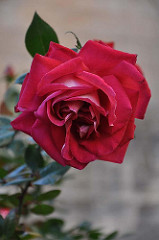

In [9]:
roses= list(data_dir.glob('rose/*'))
print(roses[0])
PIL.Image.open(str(roses[1]))

In [14]:
img_height,img_width=240,240
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 2080 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 519 files for validation.


In [17]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose']


In [ ]:
#define model - get from keras/application

In [21]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',classes=3,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 15s 0us/step


#Now, that we have imported a pre-trained model, we will also add a fully connected and output layer where actual learning can take place.

In [27]:
resnet_model.add(Flatten()) #flatten to 1D
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))#output layer

In [28]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
 flatten_1 (Flatten)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 512)               3072      
                                                                 
 dense_3 (Dense)             (None, 3)                 1

#The key point to note over here is that the total number of parameters in the Resnet50 model is 24 million. But the trainable parameters are only 1 million.

In [31]:
resnet_model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

hist = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


2022-05-15 01:59:27.159490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 0.2057 - accuracy: 0.9452

2022-05-15 01:59:38.778032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 16s 220ms/step - loss: 0.2057 - accuracy: 0.9452 - val_loss: 0.3394 - val_accuracy: 0.9056
Epoch 2/20
65/65 [==============================] - 14s 208ms/step - loss: 0.1663 - accuracy: 0.9572 - val_loss: 0.2325 - val_accuracy: 0.9249
Epoch 3/20
65/65 [==============================] - 13s 203ms/step - loss: 0.1488 - accuracy: 0.9558 - val_loss: 0.2077 - val_accuracy: 0.9422
Epoch 4/20
65/65 [==============================] - 13s 204ms/step - loss: 0.1160 - accuracy: 0.9678 - val_loss: 0.2294 - val_accuracy: 0.9383
Epoch 5/20
65/65 [==============================] - 13s 204ms/step - loss: 0.1262 - accuracy: 0.9654 - val_loss: 0.3555 - val_accuracy: 0.9017
Epoch 6/20
65/65 [==============================] - 13s 203ms/step - loss: 0.1069 - accuracy: 0.9716 - val_loss: 0.2665 - val_accuracy: 0.9383
Epoch 7/20
65/65 [==============================] - 13s 203ms/step - loss: 0.0905 - accuracy: 0.9750 - val_loss: 0.3025 - val_accuracy: 0.9345
Epoch 8/20

Graph for 20 epochs

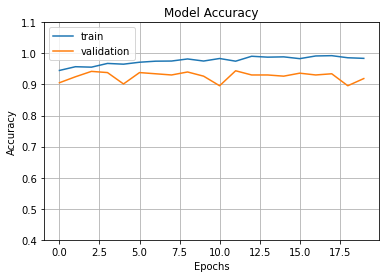

In [38]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Graph for 10 epochs

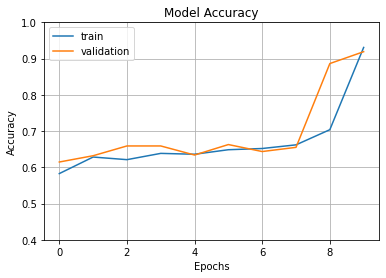

In [30]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [33]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]